In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
data = pd.read_csv("C:/Users/HTC/OneDrive/Desktop/RAINFALL_PREDICTION/austin_weather.csv")
print("Initial Dataset Shape:", data.shape)
data.head()

Initial Dataset Shape: (1319, 21)


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [25]:
data.columns = data.columns.str.strip()
data = data.drop(columns=["Date", "Events"], errors='ignore')
data = data.replace(['T', '-'], 0)
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data.dropna(inplace=True)
print("Cleaned dataset shape:",data.shape)
data.head()

Cleaned dataset shape: (1319, 19)


,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,29.59,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,29.87,10,10,5,16,6,25,0.00
2,58,45,32,31,27,23,76,52,27,30.56,30.49,30.41,10,10,10,8,3,12,0.00
3,61,46,31,36,28,21,89,56,22,30.56,30.45,30.30,10,10,7,12,4,20,0.00
4,58,50,41,44,40,36,86,71,56,30.41,30.33,30.27,10,10,7,10,2,16,0.00


In [26]:
X = data.drop("PrecipitationSumInches", axis=1)
y = data["PrecipitationSumInches"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Training and testing data created.")

Training and testing data created.


In [28]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.12170886671215614
R^2 Score: 0.29196845746211975


In [34]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
TempHighF,0.028765
TempAvgF,-0.048879
TempLowF,0.026728
DewPointHighF,0.012104
DewPointAvgF,-0.027645
DewPointLowF,0.011614
HumidityHighPercent,0.007822
HumidityAvgPercent,-0.019452
HumidityLowPercent,0.017102
SeaLevelPressureHighInches,0.061617


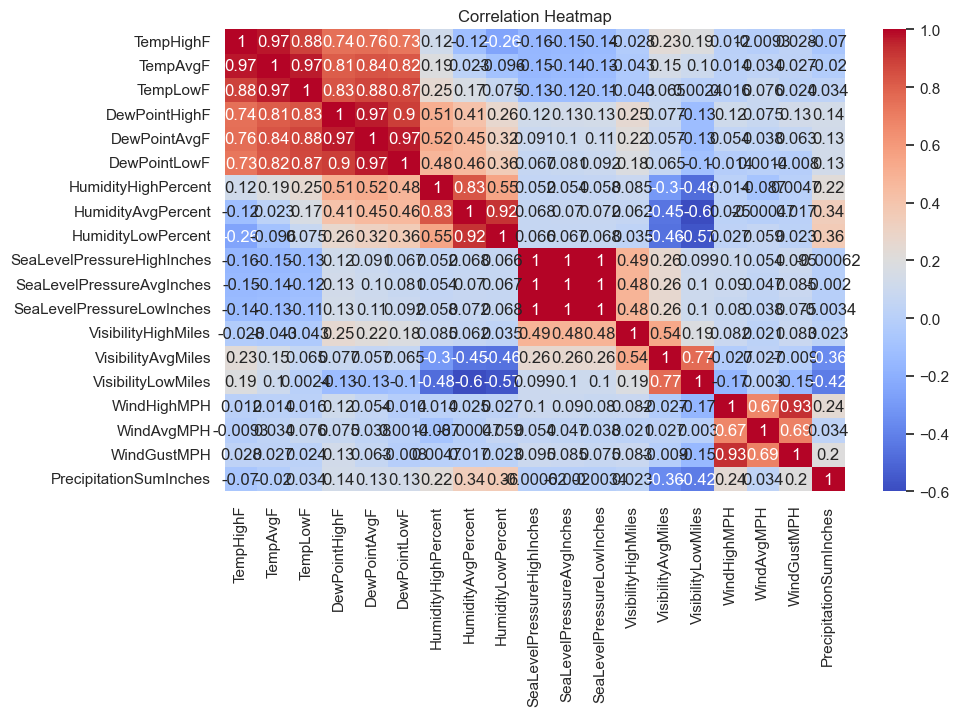

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

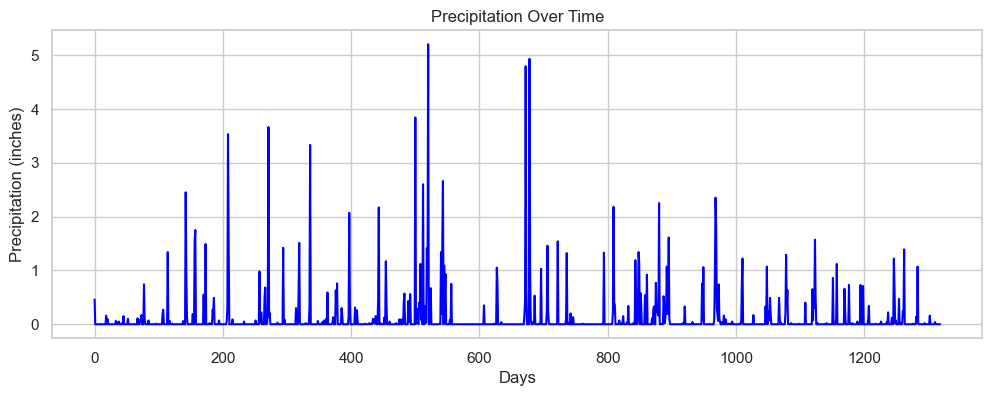

In [15]:
plt.figure(figsize=(12, 4))
plt.plot(df["PrecipitationSumInches"].values, color='blue')
plt.title("Precipitation Over Time")
plt.xlabel("Days")
plt.ylabel("Precipitation (inches)")
plt.show()

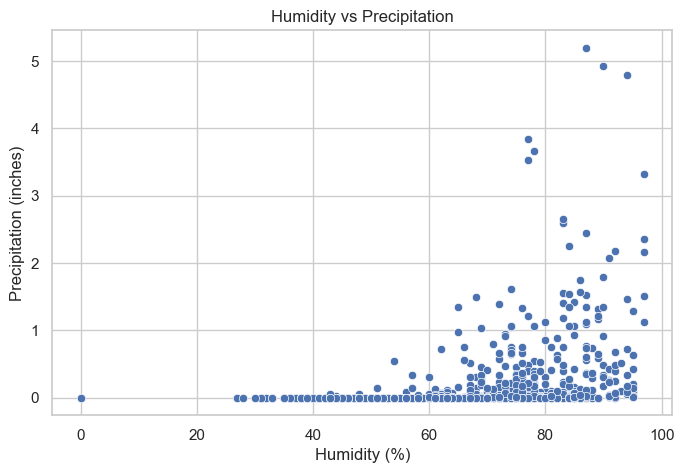

In [16]:
# 📘 Step 11: Humidity vs Precipitation Scatter Plot

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["HumidityAvgPercent"], y=df["PrecipitationSumInches"])
plt.title("Humidity vs Precipitation")
plt.xlabel("Humidity (%)")
plt.ylabel("Precipitation (inches)")
plt.show()

In [17]:
print("Available columns:", df.columns.tolist())

Available columns: ['TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF', 'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent', 'HumidityAvgPercent', 'HumidityLowPercent', 'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches', 'SeaLevelPressureLowInches', 'VisibilityHighMiles', 'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH', 'WindGustMPH', 'PrecipitationSumInches']


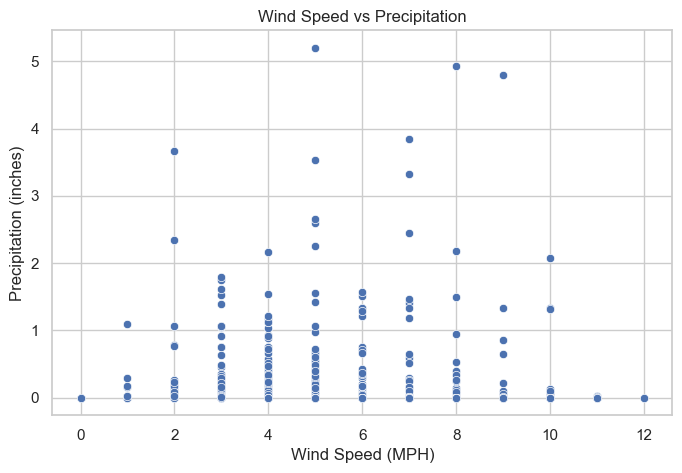

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["WindAvgMPH"], y=df["PrecipitationSumInches"])
plt.title("Wind Speed vs Precipitation")
plt.xlabel("Wind Speed (MPH)")
plt.ylabel("Precipitation (inches)")
plt.show()

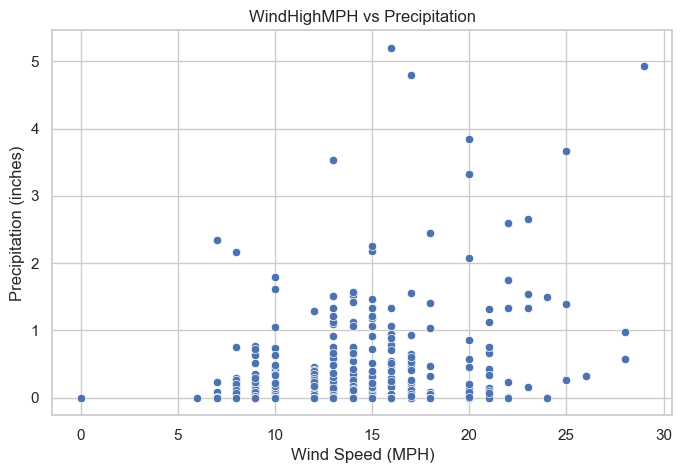

In [19]:
wind_cols = [col for col in df.columns if "Wind" in col and "MPH" in col]

if wind_cols:
    correct_wind_col = wind_cols[0]
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[correct_wind_col], y=df["PrecipitationSumInches"])
    plt.title(f"{correct_wind_col} vs Precipitation")
    plt.xlabel("Wind Speed (MPH)")
    plt.ylabel("Precipitation (inches)")
    plt.show()
else:
    print("No wind speed column found with 'Wind' and 'MPH' in its name.")